<a href="https://colab.research.google.com/github/vrindbhatu/Stock_Market_Price_Analytics--Recommendation-System/blob/main/Stock_Market_Price_Analysis_final.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Stock Market Analysis : Tesla, Ford and GM

## Project Overview

Majority of the retail investors in the world use just news and basic charting systems to trade and invest in the financial markets. This project helps big and small retail investors by analysing stock price actions and trading pattern similarities between companies that are publicly traded and belong to the same industry.

The model is built in order to analyse daily movement of stock prices, analyse it using various libraries in python and give an analysis which can be used by investors for trading or educational purposes.

Complex versions of these kinds of models already exist and operated by high end individuals like promoters or stakeholders and are developed by Quantitative Finance groups or “Quants” and are not accessible to the retail investors. So they are left with no option but to analyse these patterns manually or take someone else’s word for it.

Considering the Volume of trading that retail investors have, hiring quants in order to take care of this stuff is not a profitable strategy and that is where our algorithm and model comes in. Through this project we aim to improve segments of the trade life-cycle process, such as data processing, data modelling and forecasting. Traditional analysis has limitations in terms of scale and time but with modeling and training data sets we aim to overcome this and predict the stock behavior with equal confidence if not more. 

In this project we will be focusing on the stock performance of 3 companies, Tesla, Ford and General Motors. We have used Yahoo Finance to get the datasets of the said companies.


[1] https://finance.yahoo.com/quote/TSLA/

[2] https://finance.yahoo.com/quote/F/

[3] https://finance.yahoo.com/quote/GM/



Importing libraries

In [ ]:
import pandas as pd
import numpy as np
import plotly.graph_objects as go
import matplotlib.pyplot as plt
from statsmodels.tsa.arima_model import ARIMA
from sklearn.metrics import mean_squared_error
#from google.colab import drive
#drive.mount('/content/drive')

/usr/local/lib/python3.7/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


Datasets of three companies: **Tesla**, **Ford** and **General Motors**. 
The dataset gives the description of the stock prices for each of the companies

### Tesla - ###

In [ ]:
path = ''
Tesla_stock_data = pd.read_csv(path+'Tesla.csv')  #loading the dataset
Tesla_stock_data.head() #displaying the first five stock results of the data

,Date,Open,High,Low,Close,Adj Close,Volume
0,2016-12-06,37.104000,37.316002,36.535999,37.169998,37.169998,16958000
1,2016-12-07,37.230000,38.680000,37.000000,38.630001,38.630001,27309500
2,2016-12-08,38.410000,38.500000,37.908001,38.458000,38.458000,15970500
3,2016-12-09,38.174000,38.768002,38.161999,38.436001,38.436001,13612500
4,2016-12-12,38.560001,38.883999,38.236000,38.486000,38.486000,12194500


### Ford - ###

In [ ]:
Ford_stock_data = pd.read_csv(path + 'Ford.csv') #loading the dataset
Ford_stock_data.head() #displaying the first five stock results of the data

,Date,Open,High,Low,Close,Adj Close,Volume
0,2016-12-06,12.40,12.59,12.37,12.56,10.180296,23923900
1,2016-12-07,12.59,13.15,12.54,13.06,10.585564,58600400
2,2016-12-08,13.07,13.15,12.97,13.03,10.561246,41459500
3,2016-12-09,13.00,13.20,12.91,13.17,10.674722,45256100
4,2016-12-12,13.08,13.10,12.81,12.82,10.391034,39596800


### GM - ###

In [ ]:
GM_stock_data = pd.read_csv(path + 'GM.csv') #loading the dataset
GM_stock_data.head() #displaying the first five stock results of the data

,Date,Open,High,Low,Close,Adj Close,Volume
0,2016-12-06,35.090000,35.160000,34.910000,35.070000,30.675413,11867800
1,2016-12-07,35.180000,36.540001,35.090000,36.299999,31.751274,26622400
2,2016-12-08,36.189999,36.459999,36.040001,36.419998,31.856239,14516000
3,2016-12-09,36.410000,37.680000,36.410000,37.660000,32.940865,26434200
4,2016-12-12,37.509998,37.740002,37.009998,37.099998,32.451027,15575200


Usually the stock price datsets are clean and free from the NULL values but to cross verify we have checked if there is any missing value present in the any of the three daatasets

In [ ]:
Tesla_stock_data.isnull().sum()  #using isnull function to check the Null values and getting count of the null values for each column

Date         0
Open         0
High         0
Low          0
Close        0
Adj Close    0
Volume       0
dtype: int64

In [ ]:
Ford_stock_data.isnull().sum() #using isnull function to check the Null values and getting count of the null values for each column

Date         0
Open         0
High         0
Low          0
Close        0
Adj Close    0
Volume       0
dtype: int64

In [ ]:
GM_stock_data.isnull().sum() #using isnull function to check the Null values and getting count of the null values for each column

Date         0
Open         0
High         0
Low          0
Close        0
Adj Close    0
Volume       0
dtype: int64

Since all the columns contains numeric values we need to check whether it's data type is in float or integer form, because data type being in float and integer format will help in future calculations.

In [ ]:
print(f'Data type for columns present in Tesla stock dataset: {Tesla_stock_data.dtypes}')
print(f'Data type for columns present in General Motors stock dataset: {GM_stock_data.dtypes}')
print(f'Data type for columns present in Ford stock dataset: {Ford_stock_data.dtypes}')

Data type for columns present in Tesla stock dataset: Date          object
Open         float64
High         float64
Low          float64
Close        float64
Adj Close    float64
Volume         int64
dtype: object
Data type for columns present in General Motors stock dataset: Date          object
Open         float64
High         float64
Low          float64
Close        float64
Adj Close    float64
Volume         int64
dtype: object
Data type for columns present in Ford stock dataset: Date          object
Open         float64
High         float64
Low          float64
Close        float64
Adj Close    float64
Volume         int64
dtype: object


There are three different datasets but so in order to merge them together to get a single dataframe we need to check whether the number of rows are consistent or not. This is done by using shape method which will return a tuple representing dimension of a numpy array

In [ ]:
print(Tesla_stock_data.shape)   #to get the dimension of the dataframe
print(GM_stock_data.shape)
print(Ford_stock_data.shape)

(1258, 7)
(1258, 7)
(1258, 7)


## Add more columns ##
### Add `Moving Average` information for each dataset ###

Moving Average is the average of n days' close price. Here, we want to know the 5, 20, 60 days' average close price of each stock data. In addition, n days moving average can be written as nMA. For example: `5MA` means the average close price of last 5 days. Calculated `5MA`, `20MA` and `60MA` and add is as a new columns.

### Tesla - ###

`.rolling()` function to calculate the Close price data for the past n days.
- `'window = n'` means using the past n days data to each rows.

In [ ]:
Tesla_stock_data['5MA'] = Tesla_stock_data.loc[:,'Close'].rolling(window=5).mean() # to know the moving average of 5 days, thus, we use 'mean()' to get the average price
Tesla_stock_data['20MA'] = Tesla_stock_data.loc[:,'Close'].rolling(window=20).mean()# to know the moving average of 20 days, thus, we use 'mean()' to get the average price
Tesla_stock_data['60MA'] = Tesla_stock_data.loc[:,'Close'].rolling(window=60).mean()# to know the moving average of 60 days, thus, we use 'mean()' to get the average price
Tesla_stock_data

,Date,Open,High,Low,Close,Adj Close,Volume,5MA,20MA,60MA
0,2016-12-06,37.104000,37.316002,36.535999,37.169998,37.169998,16958000,NaN,NaN,NaN
1,2016-12-07,37.230000,38.680000,37.000000,38.630001,38.630001,27309500,NaN,NaN,NaN
2,2016-12-08,38.410000,38.500000,37.908001,38.458000,38.458000,15970500,NaN,NaN,NaN
3,2016-12-09,38.174000,38.768002,38.161999,38.436001,38.436001,13612500,NaN,NaN,NaN
4,2016-12-12,38.560001,38.883999,38.236000,38.486000,38.486000,12194500,38.236000,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...
1253,2021-11-29,1100.989990,1142.670044,1100.189941,1136.989990,1136.989990,19464500,1120.162012,1119.457501,920.016667
1254,2021-11-30,1144.369995,1168.000000,1118.000000,1144.760010,1144.760010,27092000,1117.740015,1116.266003,926.869833
1255,2021-12-01,1160.699951,1172.839966,1090.760010,1095.000000,1095.000000,22816800,1114.934009,1112.416003,932.571167
1256,2021-12-02,1099.060059,1113.000000,1056.650024,1084.599976,1084.599976,24371600,1108.654004,1105.953003,938.083333


Because moving average is calculate base on the historical data, the first few days of the dataset would be `NaN` and will be remove for later analysis.

### GM - ###

In [ ]:
GM_stock_data['5MA'] = GM_stock_data.loc[:,'Close'].rolling(window=5).mean()
GM_stock_data['20MA'] = GM_stock_data.loc[:,'Close'].rolling(window=20).mean()
GM_stock_data['60MA'] = GM_stock_data.loc[:,'Close'].rolling(window=60).mean()
GM_stock_data

,Date,Open,High,Low,Close,Adj Close,Volume,5MA,20MA,60MA
0,2016-12-06,35.090000,35.160000,34.910000,35.070000,30.675413,11867800,NaN,NaN,NaN
1,2016-12-07,35.180000,36.540001,35.090000,36.299999,31.751274,26622400,NaN,NaN,NaN
2,2016-12-08,36.189999,36.459999,36.040001,36.419998,31.856239,14516000,NaN,NaN,NaN
3,2016-12-09,36.410000,37.680000,36.410000,37.660000,32.940865,26434200,NaN,NaN,NaN
4,2016-12-12,37.509998,37.740002,37.009998,37.099998,32.451027,15575200,36.509999,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...
1253,2021-11-29,61.110001,61.540001,59.650002,59.860001,59.860001,15033100,61.865999,60.5300,56.053333
1254,2021-11-30,59.200001,59.840000,57.439999,57.869999,57.869999,21282200,60.627999,60.6490,56.204166
1255,2021-12-01,59.250000,60.590000,58.009998,58.060001,58.060001,26353700,59.630000,60.7725,56.359833
1256,2021-12-02,58.750000,61.299999,58.700001,61.020000,61.020000,25365100,59.396000,61.0235,56.560666


### Ford - ###

In [ ]:
Ford_stock_data['5MA'] = Ford_stock_data.loc[:,'Close'].rolling(window=5).mean()
Ford_stock_data['20MA'] = Ford_stock_data.loc[:,'Close'].rolling(window=20).mean()
Ford_stock_data['60MA'] = Ford_stock_data.loc[:,'Close'].rolling(window=60).mean()
Ford_stock_data

,Date,Open,High,Low,Close,Adj Close,Volume,5MA,20MA,60MA
0,2016-12-06,12.400000,12.590000,12.370000,12.560000,10.180296,23923900,NaN,NaN,NaN
1,2016-12-07,12.590000,13.150000,12.540000,13.060000,10.585564,58600400,NaN,NaN,NaN
2,2016-12-08,13.070000,13.150000,12.970000,13.030000,10.561246,41459500,NaN,NaN,NaN
3,2016-12-09,13.000000,13.200000,12.910000,13.170000,10.674722,45256100,NaN,NaN,NaN
4,2016-12-12,13.080000,13.100000,12.810000,12.820000,10.391034,39596800,12.928,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...
1253,2021-11-29,20.070000,20.190001,19.490000,19.670000,19.670000,68778700,20.070,19.5445,16.167000
1254,2021-11-30,19.620001,19.950001,19.030001,19.190001,19.190001,103238400,19.812,19.6065,16.272000
1255,2021-12-01,19.629999,20.469999,19.530001,19.580000,19.580000,125295600,19.688,19.6850,16.382500
1256,2021-12-02,19.500000,20.110001,19.280001,19.870001,19.870001,94142300,19.612,19.7470,16.496500


### Add `Exponential Moving Average(EMA)` information for each dataset ###

EMA is a type of moving average that places a greater weight on the recently data points. It weighted moving average more to recent price changes.Want to know the 50-day and 200-day EMA.

#### The formula for EMA ####

`today's EMA = (today's close price * multiplier) + (yesterday's EMA * (1 - multiplier))`

***Note:*** multiplier = smoothing / (1 + day period)

***Note:*** smoothing is the measure of how much weight to emphasis on the recent price. Here, we set the smoothing factor to 2.

#### Define a function to calculate EMA ####

The function will take two input which is the dataframe and the number of days for calculaing the EMA. The return value will be a list of EMA data.

When calculating the EMA, we need to know the `simple moving average(SMA)` of the first n days. The `SMA` is the first n days average close price.

In [ ]:
def calculate_EMA(df, nDays):
    smoothing = 2 # we set the smoothing factor to 2
    multiplier = smoothing / (1 + nDays) 
    nRows = len(df)
    
    # minus 1 because the index of the data starts from 0
    SMA = df.loc[:(nDays - 1),'Close'].mean() 
    
    # create a list to store the EMA
    EMA_list = []
    
    for i in range(0, nRows):
        if i < nDays: # the first n days will not have EMA
            EMA_list.append(np.nan)
        elif i == nDays: # the nth day EMA will be the nth day SMA
            EMA_list.append(SMA)
        else: # apply the formula here
            EMA_list.append((df.loc[i,'Close'] * multiplier) + EMA_list[-1] * (1 - multiplier))
    
    return EMA_list

### 50-day EMA ###



In [ ]:
num_of_days = 50 # set the number of days we are using for calculate EMA
Tesla_stock_data['50EMA'] = pd.Series(calculate_EMA(Tesla_stock_data, num_of_days))
GM_stock_data['50EMA'] = pd.Series(calculate_EMA(GM_stock_data, num_of_days))
Ford_stock_data['50EMA'] = pd.Series(calculate_EMA(Ford_stock_data, num_of_days))

### 200-day EMA ###



In [ ]:
num_of_days = 200 # set the number of days we are using for calculate EMA
Tesla_stock_data['200EMA'] = pd.Series(calculate_EMA(Tesla_stock_data, num_of_days))
GM_stock_data['200EMA'] = pd.Series(calculate_EMA(GM_stock_data, num_of_days))
Ford_stock_data['200EMA'] = pd.Series(calculate_EMA(Ford_stock_data, num_of_days))

### Add `%_Change` information for each dataset ###

The price change percentage in each days, so the function used  to calculate the pertange change of the close price is `.pct_change function`.

`%_Change` is one of the very important things for financial analysis and is the basis for all of the trading strategies and calculations.

In [ ]:
Tesla_stock_data['%_Change'] = Tesla_stock_data.loc[:, 'Close'].pct_change()
GM_stock_data['%_Change'] = GM_stock_data.loc[:, 'Close'].pct_change()
Ford_stock_data['%_Change'] = Ford_stock_data.loc[:, 'Close'].pct_change()

In [ ]:
Tesla_stock_data

,Date,Open,High,Low,Close,Adj Close,Volume,5MA,20MA,60MA,50EMA,200EMA,%_Change
0,2016-12-06,37.104000,37.316002,36.535999,37.169998,37.169998,16958000,NaN,NaN,NaN,NaN,NaN,NaN
1,2016-12-07,37.230000,38.680000,37.000000,38.630001,38.630001,27309500,NaN,NaN,NaN,NaN,NaN,0.039279
2,2016-12-08,38.410000,38.500000,37.908001,38.458000,38.458000,15970500,NaN,NaN,NaN,NaN,NaN,-0.004453
3,2016-12-09,38.174000,38.768002,38.161999,38.436001,38.436001,13612500,NaN,NaN,NaN,NaN,NaN,-0.000572
4,2016-12-12,38.560001,38.883999,38.236000,38.486000,38.486000,12194500,38.236000,NaN,NaN,NaN,NaN,0.001301
...,...,...,...,...,...,...,...,...,...,...,...,...,...
1253,2021-11-29,1100.989990,1142.670044,1100.189941,1136.989990,1136.989990,19464500,1120.162012,1119.457501,920.016667,984.766519,770.248200,0.050900
1254,2021-11-30,1144.369995,1168.000000,1118.000000,1144.760010,1144.760010,27092000,1117.740015,1116.266003,926.869833,991.040773,773.974686,0.006834
1255,2021-12-01,1160.699951,1172.839966,1090.760010,1095.000000,1095.000000,22816800,1114.934009,1112.416003,932.571167,995.117606,777.168968,-0.043468
1256,2021-12-02,1099.060059,1113.000000,1056.650024,1084.599976,1084.599976,24371600,1108.654004,1105.953003,938.083333,998.626718,780.227983,-0.009498


In [ ]:
Tesla_stock_data.rename(columns={'Open':'Tesla Open','High':'Tesla High','Low':'Tesla Low','Close':'Tesla Close','Adj Close':'Tesla Adj Close','Volume':'Tesla Volume',
                                 '5MA':'Tesla 5MA','20MA':'Tesla 20MA','60MA':'Tesla 60MA','50EMA':'Tesla 50EMA','200EMA':'Tesla 200EMA','%_Change':'Tesla %_Change'},inplace=True)
GM_stock_data.rename(columns={'Open':'GM Open','High':'GM High','Low':'GM Low','Close':'GM Close','Adj Close':'GM Adj Close','Volume':'GM Volume',
                              '5MA':'GM 5MA','20MA':'GM 20MA','60MA':'GM 60MA','50EMA':'GM 50EMA','200EMA':'GM 200EMA','%_Change':'GM %_Change'},inplace=True)
Ford_stock_data.rename(columns={'Open':'Ford Open','High':'Ford High','Low':'Ford Low','Close':'Ford Close','Adj Close':'Ford Adj Close','Volume':'Ford Volume',
                                '5MA':'Ford 5MA','20MA':'Ford 20MA','60MA':'Ford 60MA','50EMA':'Ford 50EMA','200EMA':'Ford 200EMA','%_Change':'Ford %_Change'},inplace=True)

In [ ]:
GM_stock_data.drop(['Date'],axis = 1,inplace=True)

In [ ]:
Ford_stock_data.drop(['Date'],axis = 1,inplace = True)

In [ ]:
merge1 = pd.concat([Tesla_stock_data,GM_stock_data],axis=1)

In [ ]:
merge1.head()

,Date,Tesla Open,Tesla High,Tesla Low,Tesla Close,Tesla Adj Close,Tesla Volume,Tesla 5MA,Tesla 20MA,Tesla 60MA,...,GM Low,GM Close,GM Adj Close,GM Volume,GM 5MA,GM 20MA,GM 60MA,GM 50EMA,GM 200EMA,GM %_Change
0,2016-12-06,37.104000,37.316002,36.535999,37.169998,37.169998,16958000,NaN,NaN,NaN,...,34.910000,35.070000,30.675413,11867800,NaN,NaN,NaN,NaN,NaN,NaN
1,2016-12-07,37.230000,38.680000,37.000000,38.630001,38.630001,27309500,NaN,NaN,NaN,...,35.090000,36.299999,31.751274,26622400,NaN,NaN,NaN,NaN,NaN,0.035073
2,2016-12-08,38.410000,38.500000,37.908001,38.458000,38.458000,15970500,NaN,NaN,NaN,...,36.040001,36.419998,31.856239,14516000,NaN,NaN,NaN,NaN,NaN,0.003306
3,2016-12-09,38.174000,38.768002,38.161999,38.436001,38.436001,13612500,NaN,NaN,NaN,...,36.410000,37.660000,32.940865,26434200,NaN,NaN,NaN,NaN,NaN,0.034047
4,2016-12-12,38.560001,38.883999,38.236000,38.486000,38.486000,12194500,38.236,NaN,NaN,...,37.009998,37.099998,32.451027,15575200,36.509999,NaN,NaN,NaN,NaN,-0.014870


In [ ]:
stock_data = pd.concat([merge1,Ford_stock_data],axis=1)
stock_data

,Date,Tesla Open,Tesla High,Tesla Low,Tesla Close,Tesla Adj Close,Tesla Volume,Tesla 5MA,Tesla 20MA,Tesla 60MA,...,Ford Low,Ford Close,Ford Adj Close,Ford Volume,Ford 5MA,Ford 20MA,Ford 60MA,Ford 50EMA,Ford 200EMA,Ford %_Change
0,2016-12-06,37.104000,37.316002,36.535999,37.169998,37.169998,16958000,NaN,NaN,NaN,...,12.370000,12.560000,10.180296,23923900,NaN,NaN,NaN,NaN,NaN,NaN
1,2016-12-07,37.230000,38.680000,37.000000,38.630001,38.630001,27309500,NaN,NaN,NaN,...,12.540000,13.060000,10.585564,58600400,NaN,NaN,NaN,NaN,NaN,0.039809
2,2016-12-08,38.410000,38.500000,37.908001,38.458000,38.458000,15970500,NaN,NaN,NaN,...,12.970000,13.030000,10.561246,41459500,NaN,NaN,NaN,NaN,NaN,-0.002297
3,2016-12-09,38.174000,38.768002,38.161999,38.436001,38.436001,13612500,NaN,NaN,NaN,...,12.910000,13.170000,10.674722,45256100,NaN,NaN,NaN,NaN,NaN,0.010744
4,2016-12-12,38.560001,38.883999,38.236000,38.486000,38.486000,12194500,38.236000,NaN,NaN,...,12.810000,12.820000,10.391034,39596800,12.928,NaN,NaN,NaN,NaN,-0.026576
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1253,2021-11-29,1100.989990,1142.670044,1100.189941,1136.989990,1136.989990,19464500,1120.162012,1119.457501,920.016667,...,19.490000,19.670000,19.670000,68778700,20.070,19.5445,16.167000,17.436158,14.184704,-0.004051
1254,2021-11-30,1144.369995,1168.000000,1118.000000,1144.760010,1144.760010,27092000,1117.740015,1116.266003,926.869833,...,19.030001,19.190001,19.190001,103238400,19.812,19.6065,16.272000,17.504936,14.234508,-0.024403
1255,2021-12-01,1160.699951,1172.839966,1090.760010,1095.000000,1095.000000,22816800,1114.934009,1112.416003,932.571167,...,19.530001,19.580000,19.580000,125295600,19.688,19.6850,16.382500,17.586311,14.287697,0.020323
1256,2021-12-02,1099.060059,1113.000000,1056.650024,1084.599976,1084.599976,24371600,1108.654004,1105.953003,938.083333,...,19.280001,19.870001,19.870001,94142300,19.612,19.7470,16.496500,17.675867,14.343243,0.014811


## Filter out the NaN value in the `200EMA` column ##

We want to get rid of the data with a `NaN` value in the `200EMA` column. Therefore, we use `.notnull()` to get those rows that do not have `NaN`.

Also, we want to reset the index by using `reset_index()` function.

In [ ]:
stock_data = stock_data[stock_data['Tesla 200EMA'].notnull()].reset_index(drop=True)
stock_data

,Date,Tesla Open,Tesla High,Tesla Low,Tesla Close,Tesla Adj Close,Tesla Volume,Tesla 5MA,Tesla 20MA,Tesla 60MA,...,Ford Low,Ford Close,Ford Adj Close,Ford Volume,Ford 5MA,Ford 20MA,Ford 60MA,Ford 50EMA,Ford 200EMA,Ford %_Change
0,2017-09-22,73.297997,73.980003,70.176003,70.218002,70.218002,40797000,74.063199,71.953800,69.379400,...,11.720000,11.840000,10.009714,30196500,11.724,11.3905,11.219500,11.274268,11.698750,0.010239
1,2017-09-25,70.629997,71.494003,68.575996,68.998001,68.998001,38029500,72.462799,71.923200,69.326867,...,11.840000,11.940000,10.094253,40766000,11.786,11.4465,11.232333,11.300375,11.701150,0.008446
2,2017-09-26,70.185997,70.248001,68.180000,69.050003,69.050003,35781500,71.268800,71.919100,69.272333,...,11.900000,11.930000,10.085799,30646700,11.828,11.5035,11.244667,11.325066,11.703428,-0.000838
3,2017-09-27,69.980003,70.297997,68.099998,68.194000,68.194000,30301500,69.951201,71.855200,69.233500,...,11.860000,11.950000,10.102709,28412200,11.876,11.5590,11.251167,11.349574,11.705881,0.001676
4,2017-09-28,67.975998,68.550003,67.080002,67.919998,67.919998,26598000,68.876001,71.719400,69.275200,...,11.900000,11.960000,10.111163,23105700,11.924,11.6100,11.262167,11.373512,11.708410,0.000837
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1053,2021-11-29,1100.989990,1142.670044,1100.189941,1136.989990,1136.989990,19464500,1120.162012,1119.457501,920.016667,...,19.490000,19.670000,19.670000,68778700,20.070,19.5445,16.167000,17.436158,14.184704,-0.004051
1054,2021-11-30,1144.369995,1168.000000,1118.000000,1144.760010,1144.760010,27092000,1117.740015,1116.266003,926.869833,...,19.030001,19.190001,19.190001,103238400,19.812,19.6065,16.272000,17.504936,14.234508,-0.024403
1055,2021-12-01,1160.699951,1172.839966,1090.760010,1095.000000,1095.000000,22816800,1114.934009,1112.416003,932.571167,...,19.530001,19.580000,19.580000,125295600,19.688,19.6850,16.382500,17.586311,14.287697,0.020323
1056,2021-12-02,1099.060059,1113.000000,1056.650024,1084.599976,1084.599976,24371600,1108.654004,1105.953003,938.083333,...,19.280001,19.870001,19.870001,94142300,19.612,19.7470,16.496500,17.675867,14.343243,0.014811


## Data Analysis

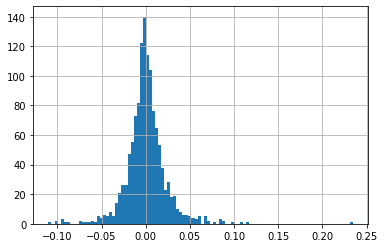

In [ ]:
#binning the Ford dataset and creating a histogram
Ford_stock_data['Ford %_Change'].hist(bins= 100)

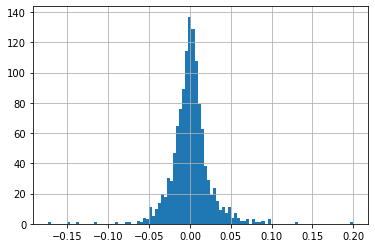

In [ ]:
#binning the GM dataset and creating a histogram
GM_stock_data['GM %_Change'].hist(bins = 100)

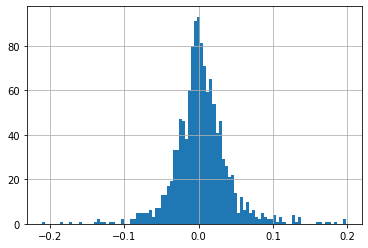

In [ ]:
#binning the Tesla dataset and creating a histogram
Tesla_stock_data['Tesla %_Change'].hist(bins = 100)

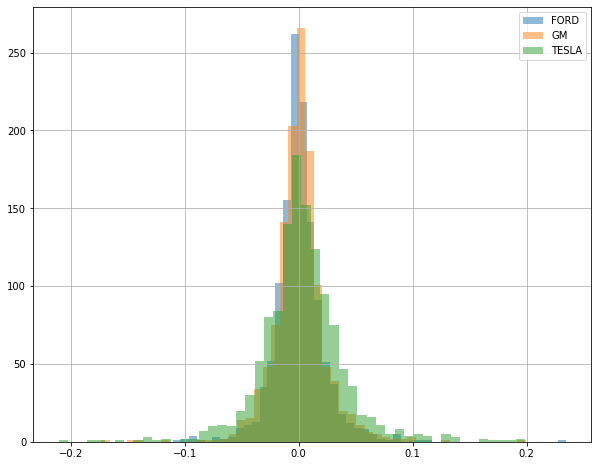

In [ ]:
# Plotting all istograms together for comparision
Ford_stock_data['Ford %_Change'].hist(bins= 50, label = 'FORD',figsize = (10,8), alpha = 0.5)
GM_stock_data['GM %_Change'].hist(bins = 50, label = 'GM',  alpha = 0.5)
Tesla_stock_data['Tesla %_Change'].hist(bins = 50, label = 'TESLA', alpha = 0.5)
plt.legend()

Here, from the histogram we can see that the percentage change in the stock prices for all the stocks from the automobile industry are related to each other still there is quite a difference between them in the percentage returns. If we look at the histogram for tesla we can see a lot of values that are far away from the center. And, as observed it which means that it is more likely to give short term capital gains for trading purposes compated to GM and Ford. But the same goes for the losses as well, we can see that tesla has had a highest drop of more than 20% while the same thing for ford is nearly 11% and for GM is a little more than 15%. So, Tesla ironically inspite of having such a market capitalizaiton, which makes it more difficult to move the price of Tesla by a huge percentage, has a higher volatility compared to Ford and GM. This could be accounted to the fact that Elon Musk uses Twitter a lot and a lot of his tweets have direct impact on the stock price of Tesla only and not all of the stocks in the automobile industry.

In [ ]:
from pandas.plotting import scatter_matrix

In [ ]:
car_comp = pd.concat([Tesla_stock_data['Tesla Close'], Ford_stock_data['Ford Close'], GM_stock_data['GM Close']], axis = 1)
car_comp.columns = ['Tesla Close', 'Ford Close', 'GM Close']

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7f861e76bbd0>,
      dtype=object)

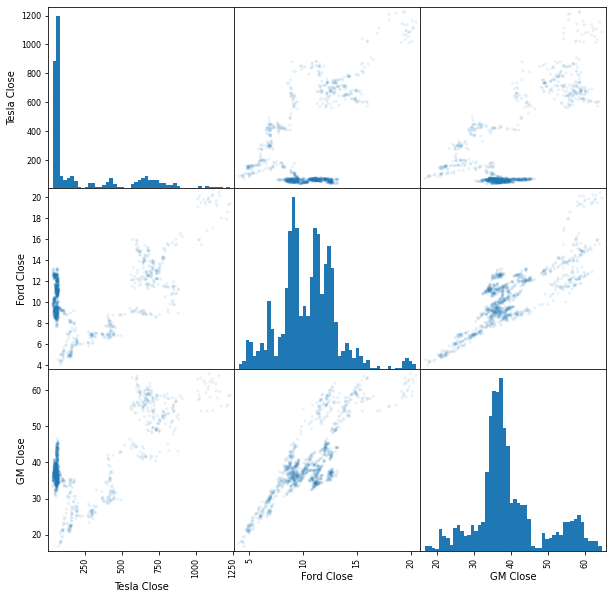

In [ ]:
scatter_matrix(car_comp, figsize=(10,10), alpha=0.1, hist_kwds={'bins':50})

Scatter matrix plot is a good way to visualize bivariate relationships between several different combinations of variables. Each sactter plot in the matrix shows the relationship between a pair of variables. In a scatter plot, we want to know if there is some kind of linear or nonlinear relationship between a pair of variables. Thus, we can observe the relationships between several variables at on time.

From the scatter matrix plot above, we notice that Ford and GM might have some positive relationship. When the close price of Ford increase, the close price of FM seems to increase as well.

Ford and GM are the two biggest automakers in the United States. Both of them have gone through the credit crisis of 2008 but fought their way back to the market and have achieved remarkable revenue growth since then. In the past few years, they both were working on improving the fuel efficiency of their car to keep their products popular among customers. Moreover, they were following the movement toward all-electric vehicles. Their marketing strategy seemed to have some similarity. Therefore, their stock price relationship might have positive relationship.

To sum up, although the daily close price of Ford and GM seems to have some positive relationship, we might need to do some more research or analysis on them to find out the reason of the positive relashiption between them.

## Creating Candlestick Charts for Tesla, Ford and GM

Tesla

In [ ]:
fig1 = go.Figure(data=[go.Candlestick(x=stock_data['Date'],
                open=stock_data['Tesla Open'], high= stock_data['Tesla High'],
                low=stock_data['Tesla Low'], close=stock_data['Tesla Close'])
                     ])

fig1.update_layout(xaxis_rangeslider_visible=False)
fig1.show()


Ford

In [ ]:
fig2 = go.Figure(data=[go.Candlestick(x=stock_data['Date'],
                open=stock_data['Ford Open'], high= stock_data['Ford High'],
                low=stock_data['Ford Low'], close=stock_data['Ford Close'])
                     ])

fig2.update_layout(xaxis_rangeslider_visible=False)
fig2.show()

GM

In [ ]:
fig3 = go.Figure(data=[go.Candlestick(x=stock_data['Date'],
                open=stock_data['GM Open'], high= stock_data['GM High'],
                low=stock_data['GM Low'], close=stock_data['GM Close'])
                     ])

fig3.update_layout(xaxis_rangeslider_visible=False)
fig3.show()

The candlestick charts help us visualize the pattern in the price movement for all the three stocks.

Here we can see that again over the past 5 years Tesla has had insanely good price movements compared to Ford and GM.

We can also see that in all the three candlestick charts there is a sharp decline in 2020 in the March and April months. That is around the same time when COVID happened for the first time and all the economies of the world were going down.

We can relate that drop of all the three companies to the happening and spreading of COVID.

There were lockdowns everywhere, so people did not go out more often. People were not allowed to travel a lot so they would not even go on vacations. This means that there would be very less car sales and very less car rentals as well.

Now, if COVID were to stay around for a year, the investors could not take that loss because all the three companies had a zero or negative balance sheet for a lot of quarters in 2020.

Using this information and analysis we can know that , if there is another pandemic ever( god forbid) that the automobile sector is always going to suffer and it is better to get out of it as soon as possible. This theory is justfied by the price movements seen in the candlestick chart.

#### `The AutoRegressive Integrated Moving Average (ARIMA) model`

#### Model parameters
The standard ARIMA models expect as input parameters 3 arguments i.e. p,d,q.
##### p is the number of lag observations.
##### d is the degree of differencing.
##### q is the size/width of the moving average window.

* Let’s divide the data into a training (70 % ) and test (30%) set. ARIMA parameters: p=4, d=1 and q=0.

In [ ]:
# Setting the date as the index or time series plots and graphs
stock_data = stock_data.set_index('Date')

### Tesla

In [ ]:
# training and calculating Mean Squared Error for Tesla
train_data, test_data = Tesla_stock_data[0:int(len(Tesla_stock_data)*0.7)], Tesla_stock_data[int(len(Tesla_stock_data)*0.7):]

training_data = train_data['Tesla Close'].values
test_data = test_data['Tesla Close'].values

history = [x for x in training_data]
model_predictions = []
N_test_observations = len(test_data)
for time_point in range(N_test_observations):
    model = ARIMA(history, order=(4,1,0))
    model_fit = model.fit(disp=0)
    output = model_fit.forecast()
    yhat = output[0]
    model_predictions.append(yhat)
    true_test_value = test_data[time_point]
    history.append(true_test_value)
MSE_error = mean_squared_error(test_data, model_predictions)
print('Testing Mean Squared Error is {}'.format(MSE_error))

Testing Mean Squared Error is 638.9245512326232


## Ford

In [ ]:
# training and calculating Mean Squared Error for Ford

train_data, test_data = Ford_stock_data[0:int(len(Ford_stock_data)*0.7)], Ford_stock_data[int(len(Ford_stock_data)*0.7):]
training_data = train_data['Ford Close'].values
test_data = test_data['Ford Close'].values
history = [x for x in training_data]
model_predictions = []
N_test_observations = len(test_data)
for time_point in range(N_test_observations):
    model = ARIMA(history, order=(4,1,0))
    model_fit = model.fit(disp=0)
    output = model_fit.forecast()
    yhat = output[0]
    model_predictions.append(yhat)
    true_test_value = test_data[time_point]
    history.append(true_test_value)
MSE_error = mean_squared_error(test_data, model_predictions)
print('Testing Mean Squared Error is {}'.format(MSE_error))



Testing Mean Squared Error is 0.0925468838395806


## General Motors

In [ ]:
# training and calculating Mean Squared Error for GM


train_data, test_data = GM_stock_data[0:int(len(GM_stock_data)*0.7)], GM_stock_data[int(len(GM_stock_data)*0.7):]
training_data = train_data['GM Close'].values
test_data = test_data['GM Close'].values
history = [x for x in training_data]
model_predictions = []
N_test_observations = len(test_data)
for time_point in range(N_test_observations):
    model = ARIMA(history, order=(4,1,0))
    model_fit = model.fit(disp=0)
    output = model_fit.forecast()
    yhat = output[0]
    model_predictions.append(yhat)
    true_test_value = test_data[time_point]
    history.append(true_test_value)
MSE_error = mean_squared_error(test_data, model_predictions)
print('Testing Mean Squared Error is {}'.format(MSE_error))



Testing Mean Squared Error is 1.362112668468401


Here we have used ARIMA model to predict the stock prices for the individual companies based on the previous stock price movements. ARIMA model is widely used in the finance industry to predict stock prices, derivaties like stock options and futures and also housing prices. 

We have split the data as 70% for training the model and 30% for testing out the results of the model. We have trained the model 3 different times for all three stock prices to get accurate results for each company. 

As you can see the model is doing a great job predicting the price , we have a line for the 30% of prices that are actual along with the preductions that the model returns. It is off by just a few points at every price point. The model seemed to be overfitting the data. So, we tried running the model on the other 2 stocks price data and we realized that the model was doing an exceptionally good task at predicting the future prices.

We can also see that the Mean Squared Error for Tesla is exponentially high which again suggests the volatility that it has and that makes if far more difficult to predict the prices for Tesla compated to GM and Ford.

